In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import accuracy_score,r2_score
%matplotlib inline

In [3]:
#read the data
data = pd.read_csv('ionosphere.csv')

#### Some information on the dataset
This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the [paper](https://pdfs.semanticscholar.org/e0d2/de05caacdfa8073b2b4f77c5e72cb2449b81.pdf) for more details. 

The targets were free electrons in the ionosphere."Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere. 

In order to check the effect of regularization on test data, split the data into train and test using sklearn.

In [4]:
#split the data into train and test
X_train, X_test=train_test_split(data)

Create a model using Logistic Regression from sklearn. 

    1. Perform a ridge regression using sklearn. Test for the accuracy on the test dataset

In [5]:
#perform ridge regression and test accuracy
mod = linear_model.LogisticRegression(penalty='l2',C=0.1)
X=X_train.drop('target',axis=1)
Y=X_train['target']

mod.fit(X,Y)

X1=X_test.drop('target',axis=1)
Y1=np.array(X_test['target'])

yhat=mod.predict(X1)
accuracy_score(Y1, yhat)

0.8636363636363636

    2. Perform lasso regression using sklearn. Test for the accuracy on the test dataset

In [6]:
#perform lasso regression and test accuracy
#perform ridge regression and test accuracy
mod = linear_model.LogisticRegression(penalty='l1',C=0.1)
X=X_train.drop('target',axis=1)
Y=X_train['target']

mod.fit(X,Y)

X1=X_test.drop('target',axis=1)
Y1=np.array(X_test['target'])

yhat=mod.predict(X1)
accuracy_score(Y1, yhat)

0.7840909090909091

    3. Tune the parameters of C(1/lambda) and appropriate choice of regularization. Default values of C and regularization is 1.0 and 'l2' - ridge respectively. Record the results (accuracy, coefficients and lambdas) in a dataframe.

## for Ridge regression

In [7]:
def ridge_reg(c):
    mod = linear_model.LogisticRegression(penalty='l2',C=c)
    X_train.head()

    X = X_train.drop('target', axis=1)
    Y = X_train['target']
    mod.fit(X,Y)

    X1 = X_test.drop('target',axis=1)
    y = np.array(X_test['target'])
    yhat = mod.predict(X1)

    a = accuracy_score(y,yhat)
    coeff = mod.coef_
    
    return (a,coeff)


c=[10,20,40,50,100]
lam=[0.1,0.05,0.025,0.02,0.01]
l = []

df = pd.DataFrame(columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','X30','X31','X32','X33','X34'])

for i in range(5):
    a,coeff = ridge_reg(c[i])
    l.append(a)
    df.loc[i] = coeff[0]
    
df1 = pd.DataFrame({'Accuracy':l,'lambda':lam})
final = [df1,df]

final=pd.concat([df1,df],axis=1)
final

,Accuracy,lambda,X1,X2,X3,X4,X5,X6,X7,X8,...,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34
0,0.931818,0.100,5.462355,0.0,1.135138,0.067268,2.555876,2.910665,0.719990,1.883302,...,1.637992,0.414047,-3.194943,-0.253601,0.614772,2.673263,0.961610,-0.786776,-1.366343,-2.572849
1,0.931818,0.050,7.760025,0.0,1.072928,-0.244351,2.903516,3.473822,0.795591,2.302099,...,2.029543,0.056993,-3.910187,-0.124320,0.809414,3.681419,1.226269,-0.918221,-1.701343,-3.098076
2,0.931818,0.025,10.605351,0.0,1.030781,-0.682192,3.209913,4.055796,0.972791,2.816085,...,2.485927,-0.347108,-4.778548,0.060157,0.957707,4.904954,1.614365,-1.120224,-2.026227,-3.594907
3,0.943182,0.020,11.644887,0.0,1.022183,-0.850562,3.310240,4.247196,1.045011,2.991922,...,2.662567,-0.486304,-5.088321,0.138763,0.979977,5.341474,1.774023,-1.206648,-2.124856,-3.748666
4,0.920455,0.010,15.233875,0.0,0.988708,-1.424704,3.649154,4.880402,1.315907,3.561802,...,3.343762,-0.903670,-6.162710,0.492686,0.955020,6.803873,2.410190,-1.563098,-2.433533,-4.223187


    4. Plot the coefficients against lambdas and accuracy against lambdas for both lasso and ridge regularization.

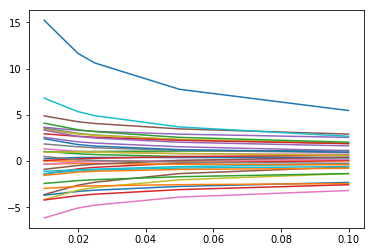

In [8]:

plt.plot(final['lambda'],final['X1'])
plt.plot(final['lambda'],final['X2'])
plt.plot(final['lambda'],final['X3'])
plt.plot(final['lambda'],final['X4'])
plt.plot(final['lambda'],final['X5'])
plt.plot(final['lambda'],final['X6'])
plt.plot(final['lambda'],final['X7'])
plt.plot(final['lambda'],final['X8'])
plt.plot(final['lambda'],final['X9'])
plt.plot(final['lambda'],final['X10'])
plt.plot(final['lambda'],final['X11'])
plt.plot(final['lambda'],final['X12'])
plt.plot(final['lambda'],final['X13'])
plt.plot(final['lambda'],final['X14'])
plt.plot(final['lambda'],final['X15'])
plt.plot(final['lambda'],final['X16'])
plt.plot(final['lambda'],final['X17'])
plt.plot(final['lambda'],final['X18'])
plt.plot(final['lambda'],final['X19'])
plt.plot(final['lambda'],final['X20'])
plt.plot(final['lambda'],final['X21'])
plt.plot(final['lambda'],final['X22'])
plt.plot(final['lambda'],final['X23'])
plt.plot(final['lambda'],final['X24'])
plt.plot(final['lambda'],final['X25'])
plt.plot(final['lambda'],final['X26'])
plt.plot(final['lambda'],final['X27'])
plt.plot(final['lambda'],final['X28'])
plt.plot(final['lambda'],final['X29'])
plt.plot(final['lambda'],final['X30'])
plt.plot(final['lambda'],final['X31'])
plt.plot(final['lambda'],final['X32'])
plt.plot(final['lambda'],final['X33'])
plt.plot(final['lambda'],final['X34'])

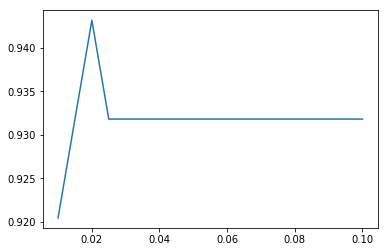

In [9]:
plt.plot(final['lambda'],final['Accuracy'])


## for Lasso regression

In [10]:
def ridge_reg(c):
    mod = linear_model.LogisticRegression(penalty='l1',C=c)
    X_train.head()

    X = X_train.drop('target', axis=1)
    Y = X_train['target']
    mod.fit(X,Y)

    X1 = X_test.drop('target',axis=1)
    y = np.array(X_test['target'])
    yhat = mod.predict(X1)

    a = accuracy_score(y,yhat)
    coeff = mod.coef_
    
    return (a,coeff)


c=[10,20,40,50,100]
lam=[0.1,0.05,0.025,0.02,0.01]
l = []

df = pd.DataFrame(columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','X14','X15','X16','X17','X18','X19','X20','X21','X22','X23','X24','X25','X26','X27','X28','X29','X30','X31','X32','X33','X34'])

for i in range(5):
    a,coeff = ridge_reg(c[i])
    l.append(a)
    df.loc[i] = coeff[0]
    
df1 = pd.DataFrame({'Accuracy':l,'lambda':lam})
final = [df1,df]

final=pd.concat([df1,df],axis=1)
final

,Accuracy,lambda,X1,X2,X3,X4,X5,X6,X7,X8,...,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34
0,0.931818,0.100,14.547208,0.0,0.848068,-0.956809,3.579360,4.399021,1.047691,3.073634,...,2.868485,-0.701854,-5.342432,0.098654,1.151173,5.666480,1.788222,-1.060784,-2.075995,-3.676806
1,0.909091,0.050,20.211995,0.0,0.881734,-1.950851,4.049983,5.445767,1.533585,3.945376,...,4.143007,-1.279736,-7.064230,1.029806,0.844583,7.862946,3.116883,-1.871197,-2.646614,-4.455550
2,0.897727,0.025,25.724176,0.0,0.811612,-2.700894,4.573891,6.454373,2.050486,4.675753,...,5.391043,-1.808083,-8.751193,2.089733,0.566000,9.835943,4.305954,-2.630408,-3.141061,-5.230173
3,0.909091,0.020,26.918158,0.0,0.771845,-2.844493,4.687996,6.690534,2.187293,4.842079,...,5.671098,-1.925258,-9.157006,2.342861,0.517903,10.285496,4.564107,-2.799954,-3.232428,-5.421602
4,0.909091,0.010,30.719733,0.0,0.666481,-3.237211,5.022577,7.358380,2.577664,5.300754,...,6.457419,-2.283798,-10.294904,3.085869,0.384499,11.532607,5.295984,-3.268375,-3.474478,-5.981841


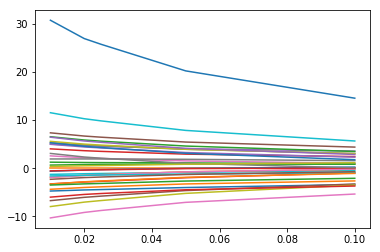

In [11]:

plt.plot(final['lambda'],final['X1'])
plt.plot(final['lambda'],final['X2'])
plt.plot(final['lambda'],final['X3'])
plt.plot(final['lambda'],final['X4'])
plt.plot(final['lambda'],final['X5'])
plt.plot(final['lambda'],final['X6'])
plt.plot(final['lambda'],final['X7'])
plt.plot(final['lambda'],final['X8'])
plt.plot(final['lambda'],final['X9'])
plt.plot(final['lambda'],final['X10'])
plt.plot(final['lambda'],final['X11'])
plt.plot(final['lambda'],final['X12'])
plt.plot(final['lambda'],final['X13'])
plt.plot(final['lambda'],final['X14'])
plt.plot(final['lambda'],final['X15'])
plt.plot(final['lambda'],final['X16'])
plt.plot(final['lambda'],final['X17'])
plt.plot(final['lambda'],final['X18'])
plt.plot(final['lambda'],final['X19'])
plt.plot(final['lambda'],final['X20'])
plt.plot(final['lambda'],final['X21'])
plt.plot(final['lambda'],final['X22'])
plt.plot(final['lambda'],final['X23'])
plt.plot(final['lambda'],final['X24'])
plt.plot(final['lambda'],final['X25'])
plt.plot(final['lambda'],final['X26'])
plt.plot(final['lambda'],final['X27'])
plt.plot(final['lambda'],final['X28'])
plt.plot(final['lambda'],final['X29'])
plt.plot(final['lambda'],final['X30'])
plt.plot(final['lambda'],final['X31'])
plt.plot(final['lambda'],final['X32'])
plt.plot(final['lambda'],final['X33'])
plt.plot(final['lambda'],final['X34'])

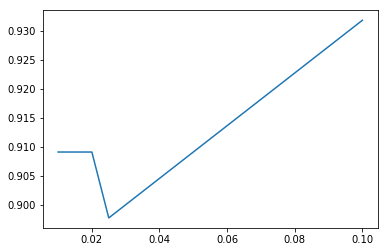

In [12]:
plt.plot(final['lambda'],final['Accuracy'])